# **Importing The Data**

In [0]:
'''
  Google collaboratory deletes files in the notebook runtime, so these are 
  the steps to follow whenever opening the notebook:
  
  1 - Download 'weather.csv', 'BOG-MED_2018-2019.xlsx', and 
      'MED-BOG_2018-2019.xlsx' from the Google Drive
  2 - Create folder in runtime called 'data'
  3 - Place downloaded files in folder 'data'
'''
import pandas as pd

# converting XLSX to a pandas DataFrame
data_bog_med = pd.read_excel('data/BOG-MED_2018-2019.xlsx')
data_med_bog = pd.read_excel('data/MED-BOG_2018-2019.xlsx')
data = data_bog_med.append(data_med_bog)
pd.set_option('display.max_columns', 50)
data.head()

,AbruptAccelerations,AbruptBrakings,ArrivalPointId,ArrivalPointName,AverageSpeed,CustomerId,DeparturePointId,DeparturePointName,DriverId,EstimatedArrivalTimeSpan,ExecutingStatusId,ExecutingStatusName,ExternalCode,FleetId,IgnitionTime,MovingTime,OperatingStatusId,OperatingStatusName,ProgrammedArrivalTime,ProgrammedDepartureTime,RealArrivalTime,RealDepartureTime,Speedings,TemplateId,Timestamp,TraveledDistance,TripComment,TripId,TripRouteId,TripRouteName,TripRouteTemplateName,VehicleId,TripTypeId,AuxiliaryVehicle,CompanyId,TemplateGroupId,TemplateGroupName
0,1.0,0.0,1224,Medellin,52.17,12,1199,Bogota,3620.0,106.0,3,Anticipado,3976157,160.0,28481.0,27777.0,8,Cumplido,2018-01-02 03:30:00,2018-01-01 17:00:00,2018-01-02 01:44:00,2018-01-01 17:28:00,0.0,NaN,2018-01-05 04:01:48.369,472676.0,NaN,275738,NaN,NaN,NaN,3752.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1224,Medellin,40.25,12,1199,Bogota,3378.0,-218.0,4,Atrasado,3944883,160.0,43560.0,34893.0,8,Cumplido,2018-01-02 11:40:00,2018-01-02 01:40:00,2018-01-02 15:18:00,2018-01-02 02:06:00,0.0,NaN,2018-01-06 00:02:49.519,505184.0,NaN,271248,NaN,NaN,NaN,3573.0,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,1224,Medellin,42.98,12,1199,Bogota,5184.0,-153.0,4,Atrasado,3941720,155.0,42300.0,32748.0,8,Cumplido,2018-01-02 14:00:00,2018-01-02 04:00:00,2018-01-02 16:33:00,2018-01-02 04:24:00,0.0,NaN,2018-01-06 00:02:49.717,495517.0,NaN,271249,NaN,NaN,NaN,3650.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1224,Medellin,44.63,12,1199,Bogota,3616.0,-134.0,4,Atrasado,3936069,44.0,41280.0,33050.0,8,Cumplido,2018-01-02 15:40:00,2018-01-02 05:40:00,2018-01-02 17:54:00,2018-01-02 06:07:00,5.0,NaN,2018-01-06 00:02:49.942,467722.0,NaN,271250,NaN,NaN,NaN,4079.0,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1224,Medellin,44.41,12,1199,Bogota,3636.0,-96.0,4,Atrasado,3941713,155.0,37380.0,33224.0,8,Cumplido,2018-01-02 16:30:00,2018-01-02 06:30:00,2018-01-02 18:06:00,2018-01-02 06:44:00,0.0,NaN,2018-01-06 00:02:50.028,458692.0,NaN,271251,NaN,NaN,NaN,3590.0,NaN,NaN,NaN,NaN,NaN


# **Mapping Columns**

In [0]:
'''
  Rename columns for organizational purposes / Pythonic naming conventions
'''
name_map = {
    # 1 - IDs to identify the trip
    'CompanyId': 'id_company',
    'DriverId': 'id_driver',
    'VehicleId': 'id_vehicle',

    # 2 - Infraction information
    'AbruptAccelerations': 'infraction_abrupt_accelerations',
    'AbruptBrakings': 'infraction_abrupt_brakings',
    'Speedings': 'infraction_speedings',

    # 3 - Data about the trip
    'AverageSpeed': 'data_average_speed',
    'IgnitionTime': 'data_ignition_time',
    'MovingTime': 'data_moving_time',
    'TraveledDistance': 'data_total_distance',

    # 4 - Departure information
    'DeparturePointName': 'departure_location',
    'ProgrammedDepartureTime': 'departure_time_programmed',
    'RealDepartureTime': 'departure_time_actual',

    # 5 - Arrival information
    'ArrivalPointName': 'arrival_location',
    'ProgrammedArrivalTime': 'arrival_time_programmed',
    'RealArrivalTime': 'arrival_time_actual',
}

data = data[name_map.keys()]
data = data.rename(columns=name_map)
data.head()

,id_company,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual
0,NaN,3620.0,3752.0,1.0,0.0,0.0,52.17,28481.0,27777.0,472676.0,Bogota,2018-01-01 17:00:00,2018-01-01 17:28:00,Medellin,2018-01-02 03:30:00,2018-01-02 01:44:00
1,NaN,3378.0,3573.0,0.0,0.0,0.0,40.25,43560.0,34893.0,505184.0,Bogota,2018-01-02 01:40:00,2018-01-02 02:06:00,Medellin,2018-01-02 11:40:00,2018-01-02 15:18:00
2,NaN,5184.0,3650.0,0.0,0.0,0.0,42.98,42300.0,32748.0,495517.0,Bogota,2018-01-02 04:00:00,2018-01-02 04:24:00,Medellin,2018-01-02 14:00:00,2018-01-02 16:33:00
3,NaN,3616.0,4079.0,1.0,1.0,5.0,44.63,41280.0,33050.0,467722.0,Bogota,2018-01-02 05:40:00,2018-01-02 06:07:00,Medellin,2018-01-02 15:40:00,2018-01-02 17:54:00
4,NaN,3636.0,3590.0,0.0,0.0,0.0,44.41,37380.0,33224.0,458692.0,Bogota,2018-01-02 06:30:00,2018-01-02 06:44:00,Medellin,2018-01-02 16:30:00,2018-01-02 18:06:00


# **Cleaning Missing Data**

In [0]:
'''
  Company id and route id was included for dates later in the year, but we can 
  manually populate them since there is only one company and two routes.
'''
data['id_company'] = 9
data['id_route'] = data['departure_location'].apply(lambda x: '2932' if x == 'Medellin' else '2857')

# remove rows with missing data
print("Rows before: {}".format(len(data)))
data = data.dropna()
print("Rows after: {}".format(len(data)))

data.head()

Rows before: 13754
Rows after: 12635


,id_company,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,id_route
0,9,3620.0,3752.0,1.0,0.0,0.0,52.17,28481.0,27777.0,472676.0,Bogota,2018-01-01 17:00:00,2018-01-01 17:28:00,Medellin,2018-01-02 03:30:00,2018-01-02 01:44:00,2857
1,9,3378.0,3573.0,0.0,0.0,0.0,40.25,43560.0,34893.0,505184.0,Bogota,2018-01-02 01:40:00,2018-01-02 02:06:00,Medellin,2018-01-02 11:40:00,2018-01-02 15:18:00,2857
2,9,5184.0,3650.0,0.0,0.0,0.0,42.98,42300.0,32748.0,495517.0,Bogota,2018-01-02 04:00:00,2018-01-02 04:24:00,Medellin,2018-01-02 14:00:00,2018-01-02 16:33:00,2857
3,9,3616.0,4079.0,1.0,1.0,5.0,44.63,41280.0,33050.0,467722.0,Bogota,2018-01-02 05:40:00,2018-01-02 06:07:00,Medellin,2018-01-02 15:40:00,2018-01-02 17:54:00,2857
4,9,3636.0,3590.0,0.0,0.0,0.0,44.41,37380.0,33224.0,458692.0,Bogota,2018-01-02 06:30:00,2018-01-02 06:44:00,Medellin,2018-01-02 16:30:00,2018-01-02 18:06:00,2857


# **Adding Weather Data**

In [0]:
'''
  Populating weather at departure and destination (w/ appropriate times).

  We will use the 'departure_time_programmed' and 'arrival_time_programmed'
  to get weather forcasts (because 'departure_time_actual' & 'arrival_time_actual')
  are determined after the fact and our model will have neither available before
  a trip starts.

  This is done before partitioning the data because weather data is dependent on
  location and is not company or route-specific.
'''

# add weather data

weather = pd.read_csv('data/weather.csv')

name_map = {
  'STATION': 'station',
  'NAME': 'name',
  'LATITUDE': 'latitude',
  'LONGITUDE': 'longitude',
  'ELEVATION': 'elevation',
  'DATE': 'date',
  'PRCP': 'rainfall',
  'SNWD': 'snow_depth',
  'TAVG': 'temp',
  'TMAX': 'max_temp',
  'TMIN': 'min_temp'
}
weather = weather.rename(columns=name_map)
weather = weather.replace({'OLAYA HERRERA, CO': 'Medellin', 'BOGOTA ELDORADO, CO': 'Bogota'})

weather['date'] = pd.to_datetime(weather['date']).dt.date

stations = ['Medellin', 'Bogota']
weather_subset = weather[weather['name'].isin(stations)][['name', 'date', 'rainfall', 'temp']]

data['arrive'] = pd.to_datetime(data['arrival_time_actual']).dt.date
data['depart'] = pd.to_datetime(data['departure_time_actual']).dt.date

res = pd.DataFrame(columns=['depart_rainfall', 'depart_temp', 'arrive_rainfall', 'arrive_temp'])  
weath = weather_subset
for index, row in data.iterrows():
  depart = weath[(weath['name'] == row['departure_location']) & (weath['date'] == row['depart'])].reset_index()
  arrive = weath[(weath['name'] == row['arrival_location']) & (weath['date'] == row['arrive'])].reset_index()
  
  curr = pd.DataFrame() 
  curr['arrive_rainfall'] = arrive['rainfall']
  curr['arrive_temp'] = arrive['temp'] 
  curr['depart_rainfall'] = depart['rainfall']
  curr['depart_temp'] = depart['temp']

  res = res.append(curr, ignore_index=True)

data = pd.concat([data.reset_index(), res], axis=1)
data = data.drop(columns=['arrive', 'depart'])

data

,index,id_company,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,id_route,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp
0,0,9,3620.0,3752.0,1.0,0.0,0.0,52.17,28481.0,27777.0,472676.0,Bogota,2018-01-01 17:00:00,2018-01-01 17:28:00,Medellin,2018-01-02 03:30:00,2018-01-02 01:44:00,2857,NaN,56,NaN,72
1,1,9,3378.0,3573.0,0.0,0.0,0.0,40.25,43560.0,34893.0,505184.0,Bogota,2018-01-02 01:40:00,2018-01-02 02:06:00,Medellin,2018-01-02 11:40:00,2018-01-02 15:18:00,2857,0.02,54,NaN,72
2,2,9,5184.0,3650.0,0.0,0.0,0.0,42.98,42300.0,32748.0,495517.0,Bogota,2018-01-02 04:00:00,2018-01-02 04:24:00,Medellin,2018-01-02 14:00:00,2018-01-02 16:33:00,2857,0.02,54,NaN,72
3,3,9,3616.0,4079.0,1.0,1.0,5.0,44.63,41280.0,33050.0,467722.0,Bogota,2018-01-02 05:40:00,2018-01-02 06:07:00,Medellin,2018-01-02 15:40:00,2018-01-02 17:54:00,2857,0.02,54,NaN,72
4,4,9,3636.0,3590.0,0.0,0.0,0.0,44.41,37380.0,33224.0,458692.0,Bogota,2018-01-02 06:30:00,2018-01-02 06:44:00,Medellin,2018-01-02 16:30:00,2018-01-02 18:06:00,2857,0.02,54,NaN,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12630,6907,9,6694.0,4931.0,1.0,0.0,0.0,49.20,31049.0,28913.0,419309.0,Medellin,2019-12-30 17:45:00,2019-12-30 18:11:00,Bogota,2019-12-31 03:45:00,2019-12-31 02:51:00,2932,NaN,NaN,NaN,NaN
12631,6908,9,3418.0,4901.0,2.0,1.0,0.0,53.70,33120.0,29839.0,470959.0,Medellin,2019-12-30 17:46:00,2019-12-30 18:02:00,Bogota,2019-12-31 04:01:00,2019-12-31 03:14:00,2932,NaN,NaN,NaN,NaN
12632,6909,9,14650.0,3636.0,1.0,1.0,1.0,49.22,31096.0,27731.0,416148.0,Medellin,2019-12-30 17:47:00,2019-12-30 17:57:00,Bogota,2019-12-31 04:02:00,2019-12-31 02:49:00,2932,NaN,NaN,NaN,NaN
12633,6910,9,6584.0,3676.0,0.0,0.0,0.0,54.10,33360.0,26698.0,428667.0,Medellin,2019-12-31 01:40:00,2019-12-31 02:03:00,Bogota,2019-12-31 11:40:00,2019-12-31 11:07:00,2932,NaN,NaN,NaN,NaN


# **Partitioning Data**

In [0]:
'''
 Split the data by company ID 

 The idea is to provide insights on a company-level basis.
 Different companies may be using different vehicle types that move at different base speeds.
 Conflating these vehicle types will skew the recommendations we can give each company.
'''

unique_company_ids = data['id_company'].unique()
print("Total Companies: {}".format(unique_company_ids.size))

company_dataframes = {
    k: data[data['id_company'] == k].drop(columns=['id_company'])
    for k in unique_company_ids
}

for id_company in company_dataframes.keys():
  company_dataframe = company_dataframes[id_company]

  print("\nCompany {}'s Dataframe ({} total entries):".format(int(id_company), len(company_dataframe)))
  display(company_dataframe.head())

Total Companies: 1

Company 9's Dataframe (12635 total entries):


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,id_route,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp
0,0,3620.0,3752.0,1.0,0.0,0.0,52.17,28481.0,27777.0,472676.0,Bogota,2018-01-01 17:00:00,2018-01-01 17:28:00,Medellin,2018-01-02 03:30:00,2018-01-02 01:44:00,2857,NaN,56,NaN,72
1,1,3378.0,3573.0,0.0,0.0,0.0,40.25,43560.0,34893.0,505184.0,Bogota,2018-01-02 01:40:00,2018-01-02 02:06:00,Medellin,2018-01-02 11:40:00,2018-01-02 15:18:00,2857,0.02,54,NaN,72
2,2,5184.0,3650.0,0.0,0.0,0.0,42.98,42300.0,32748.0,495517.0,Bogota,2018-01-02 04:00:00,2018-01-02 04:24:00,Medellin,2018-01-02 14:00:00,2018-01-02 16:33:00,2857,0.02,54,NaN,72
3,3,3616.0,4079.0,1.0,1.0,5.0,44.63,41280.0,33050.0,467722.0,Bogota,2018-01-02 05:40:00,2018-01-02 06:07:00,Medellin,2018-01-02 15:40:00,2018-01-02 17:54:00,2857,0.02,54,NaN,72
4,4,3636.0,3590.0,0.0,0.0,0.0,44.41,37380.0,33224.0,458692.0,Bogota,2018-01-02 06:30:00,2018-01-02 06:44:00,Medellin,2018-01-02 16:30:00,2018-01-02 18:06:00,2857,0.02,54,NaN,72


In [0]:
'''
  Split the data by route ID
    • The idea is to provide insights on a route-by-route basis.
    • Different routes may be using different vehicles/carrying different
    types of merchandise, or may have separate factors that affect travel time.
'''
for id_company in company_dataframes.keys():
  company_data = company_dataframes[id_company]
  unique_route_ids = data['id_route'].unique()

  print("Total Unique Routes: {}".format(unique_route_ids.size))

  company_dataframes[id_company] = {
      x: company_data[company_data['id_route'] == x].drop(columns=['id_route'])
      for x in unique_route_ids
  }

  for id_route in company_dataframes[id_company].keys():
    route_data = company_dataframes[id_company][id_route]

    print("\n\nCompany {} On Route {} ({} total entries):".format(int(id_company), int(id_route), len(route_data)))
    display(route_data.head())

Total Unique Routes: 2


Company 9 On Route 2857 (6349 total entries):


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp
0,0,3620.0,3752.0,1.0,0.0,0.0,52.17,28481.0,27777.0,472676.0,Bogota,2018-01-01 17:00:00,2018-01-01 17:28:00,Medellin,2018-01-02 03:30:00,2018-01-02 01:44:00,NaN,56,NaN,72
1,1,3378.0,3573.0,0.0,0.0,0.0,40.25,43560.0,34893.0,505184.0,Bogota,2018-01-02 01:40:00,2018-01-02 02:06:00,Medellin,2018-01-02 11:40:00,2018-01-02 15:18:00,0.02,54,NaN,72
2,2,5184.0,3650.0,0.0,0.0,0.0,42.98,42300.0,32748.0,495517.0,Bogota,2018-01-02 04:00:00,2018-01-02 04:24:00,Medellin,2018-01-02 14:00:00,2018-01-02 16:33:00,0.02,54,NaN,72
3,3,3616.0,4079.0,1.0,1.0,5.0,44.63,41280.0,33050.0,467722.0,Bogota,2018-01-02 05:40:00,2018-01-02 06:07:00,Medellin,2018-01-02 15:40:00,2018-01-02 17:54:00,0.02,54,NaN,72
4,4,3636.0,3590.0,0.0,0.0,0.0,44.41,37380.0,33224.0,458692.0,Bogota,2018-01-02 06:30:00,2018-01-02 06:44:00,Medellin,2018-01-02 16:30:00,2018-01-02 18:06:00,0.02,54,NaN,72




Company 9 On Route 2932 (6286 total entries):


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp
6349,0,4776.0,3697.0,0.0,0.0,0.0,48.46,33660.0,29922.0,469358.0,Medellin,2018-01-02 01:40:00,2018-01-02 02:05:00,Bogota,2018-01-02 11:40:00,2018-01-02 12:23:00,NaN,75,0.0,58
6350,1,3703.0,3651.0,0.0,0.0,0.0,47.48,37560.0,31777.0,498262.0,Medellin,2018-01-02 04:00:00,2018-01-02 04:12:00,Bogota,2018-01-02 14:00:00,2018-01-02 14:47:00,NaN,75,0.0,58
6351,2,3445.0,3745.0,0.0,0.0,0.0,45.72,40381.0,32716.0,471793.0,Medellin,2018-01-02 06:30:00,2018-01-02 07:06:00,Bogota,2018-01-02 16:30:00,2018-01-02 18:30:00,NaN,75,0.0,58
6352,3,3793.0,3750.0,0.0,0.0,0.0,44.81,36352.0,31600.0,488084.0,Medellin,2018-01-02 09:45:00,2018-01-02 10:19:00,Bogota,2018-01-02 19:45:00,2018-01-02 20:41:00,NaN,75,0.0,58
6353,4,5221.0,3685.0,0.0,0.0,0.0,48.12,38162.0,30690.0,471535.0,Medellin,2018-01-02 15:00:00,2018-01-02 15:43:00,Bogota,2018-01-03 01:00:00,2018-01-03 02:34:00,NaN,75,0.0,58


# **Converting Timestamps**

In [0]:
'''
  Convert timestamps to four new columns:
  • datetime object
  • time of day (# of seconds since day started)
  • day of week (Mon = 0, Sun = 6)
  • month of year (Jan = 1, Dec = 12)

  This is important because we want to see the best day/time combinations for leaving,
  but these may change throughout the year.
'''

# Convert timestamps to datetime
for id_company in company_dataframes.keys():
  company_data = company_dataframes[id_company]

  for id_route in company_data.keys():
    route_data = company_data[id_route]

    route_data[
      [
       'departure_time_programmed',
       'departure_time_actual',
       'arrival_time_programmed',
       'arrival_time_actual'
      ]
    ] = route_data[
      [
       'departure_time_programmed',
       'departure_time_actual',
       'arrival_time_programmed',
       'arrival_time_actual'
      ]
    ].apply(pd.to_datetime, errors='coerce') # 'coerce' causes invalid timestamps to be converted to NaT
    route_data = route_data.dropna()
    company_dataframes[id_company][id_route] = route_data

# Add the remaining columns using the datetime object
for id_company in company_dataframes.keys():
  company_data = company_dataframes[id_company]

  for id_route in company_data.keys():
    route_data = company_data[id_route]

    route_data['departure_time_programmed_timeofday'] = route_data['departure_time_programmed'].apply(lambda dt: dt.time().hour * 3600 + dt.time().minute * 60 + dt.time().second)
    route_data['departure_time_programmed_weekday'] = route_data['departure_time_programmed'].apply(lambda dt: dt.dayofweek)
    route_data['departure_time_programmed_month'] = route_data['departure_time_programmed'].apply(lambda dt: dt.month)
    route_data['departure_time_actual_timeofday'] = route_data['departure_time_actual'].apply(lambda dt: dt.time().hour * 3600 + dt.time().minute * 60 + dt.time().second)
    route_data['departure_time_actual_weekday'] = route_data['departure_time_actual'].apply(lambda dt: dt.dayofweek)
    route_data['departure_time_actual_month'] = route_data['departure_time_actual'].apply(lambda dt: dt.month)
    route_data['arrival_time_programmed_timeofday'] = route_data['arrival_time_programmed'].apply(lambda dt: dt.time().hour * 3600 + dt.time().minute * 60 + dt.time().second)
    route_data['arrival_time_programmed_weekday'] = route_data['arrival_time_programmed'].apply(lambda dt: dt.dayofweek)
    route_data['arrival_time_programmed_month'] = route_data['arrival_time_programmed'].apply(lambda dt: dt.month)
    route_data['arrival_time_actual_timeofday'] = route_data['arrival_time_actual'].apply(lambda dt: dt.time().hour * 3600 + dt.time().minute * 60 + dt.time().second)
    route_data['arrival_time_actual_weekday'] = route_data['arrival_time_actual'].apply(lambda dt: dt.dayofweek)
    route_data['arrival_time_actual_month'] = route_data['arrival_time_actual'].apply(lambda dt: dt.month)

    print("Company {} Route {}:".format(int(id_company), int(id_route)))
    company_dataframes[id_company][id_route] = route_data
    display(company_dataframes[id_company][id_route])
    print("\n\n")

Company 9 Route 2857:


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,departure_time_actual_timeofday,departure_time_actual_weekday,departure_time_actual_month,arrival_time_programmed_timeofday,arrival_time_programmed_weekday,arrival_time_programmed_month,arrival_time_actual_timeofday,arrival_time_actual_weekday,arrival_time_actual_month
272,285,3625.0,3681.0,4.0,1.0,1.0,49.06,32880.0,28901.0,423428.0,Bogota,2018-01-26 15:00:00,2018-01-26 15:23:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:47:00,0.0,55,0.08,75,54000,4,1,55380,4,1,3600,5,1,2820,5,1
273,286,3744.0,3743.0,0.0,0.0,0.0,48.58,34380.0,21573.0,463479.0,Bogota,2018-01-26 15:01:00,2018-01-26 15:21:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:59:00,0.0,55,0.08,75,54060,4,1,55260,4,1,3600,5,1,3540,5,1
274,287,5185.0,3716.0,0.0,1.0,0.0,52.74,30600.0,28400.0,428004.0,Bogota,2018-01-26 17:00:00,2018-01-26 17:17:00,Medellin,2018-01-27 03:00:00,2018-01-27 01:56:00,0.0,55,0.08,75,61200,4,1,62220,4,1,10800,5,1,6960,5,1
275,288,3624.0,3748.0,0.0,0.0,4.0,53.16,31800.0,28363.0,426012.0,Bogota,2018-01-26 17:01:00,2018-01-26 17:21:00,Medellin,2018-01-27 03:01:00,2018-01-27 02:24:00,0.0,55,0.08,75,61260,4,1,62460,4,1,10860,5,1,8640,5,1
276,289,5271.0,3733.0,0.0,0.0,0.0,54.19,29044.0,26950.0,435228.0,Bogota,2018-01-26 17:45:00,2018-01-26 18:05:00,Medellin,2018-01-27 03:45:00,2018-01-27 02:31:00,0.0,55,0.08,75,63900,4,1,65100,4,1,13500,5,1,9060,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,6787,6440.0,3628.0,1.0,0.0,0.0,41.93,41880.0,34034.0,423314.0,Bogota,2019-12-26 05:40:00,2019-12-26 06:03:00,Medellin,2019-12-26 15:40:00,2019-12-26 17:49:00,0.0,59,0.35,70,20400,3,12,21780,3,12,56400,3,12,64140,3,12
6300,6788,3396.0,3590.0,0.0,0.0,0.0,43.55,42900.0,33776.0,425555.0,Bogota,2019-12-26 06:30:00,2019-12-26 06:53:00,Medellin,2019-12-26 16:30:00,2019-12-26 19:35:00,0.0,59,0.35,70,23400,3,12,24780,3,12,59400,3,12,70500,3,12
6301,6789,5571.0,3620.0,0.0,0.0,0.0,46.10,40200.0,32161.0,429062.0,Bogota,2019-12-26 09:45:00,2019-12-26 10:01:00,Medellin,2019-12-26 19:45:00,2019-12-26 21:17:00,0.0,59,0.35,70,35100,3,12,36060,3,12,71100,3,12,76620,3,12
6302,6790,3690.0,4792.0,0.0,0.0,0.0,47.29,35880.0,29284.0,411405.0,Bogota,2019-12-26 15:00:00,2019-12-26 15:56:00,Medellin,2019-12-27 01:00:00,2019-12-27 02:01:00,0.0,58,0.35,70,54000,3,12,57360,3,12,3600,4,12,7260,4,12





Company 9 Route 2932:


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,departure_time_actual_timeofday,departure_time_actual_weekday,departure_time_actual_month,arrival_time_programmed_timeofday,arrival_time_programmed_weekday,arrival_time_programmed_month,arrival_time_actual_timeofday,arrival_time_actual_weekday,arrival_time_actual_month
6571,235,3472.0,3597.0,0.0,0.0,1.0,50.39,34020.0,24210.0,552891.0,Medellin,2018-01-23 05:40:00,2018-01-23 06:01:00,Bogota,2018-01-23 16:40:00,2018-01-23 15:46:00,0.08,75,0.0,57,20400,1,1,21660,1,1,60000,1,1,56760,1,1
6572,236,3843.0,3747.0,0.0,0.0,0.0,49.14,31980.0,29505.0,448275.0,Medellin,2018-01-23 06:30:00,2018-01-23 07:00:00,Bogota,2018-01-23 16:30:00,2018-01-23 16:57:00,0.08,75,0.0,57,23400,1,1,25200,1,1,59400,1,1,61020,1,1
6573,237,3523.0,3742.0,1.0,0.0,1.0,51.64,33840.0,28815.0,484459.0,Medellin,2018-01-23 09:45:00,2018-01-23 10:04:00,Bogota,2018-01-23 19:45:00,2018-01-23 19:43:00,0.08,75,0.0,57,35100,1,1,36240,1,1,71100,1,1,70980,1,1
6574,238,5533.0,3679.0,1.0,1.0,1.0,48.84,34200.0,30066.0,452579.0,Medellin,2018-01-23 15:00:00,2018-01-23 15:22:00,Bogota,2018-01-24 01:00:00,2018-01-24 01:03:00,0.00,74,0.0,57,54000,1,1,55320,1,1,3600,2,1,3780,2,1
6575,239,3468.0,4083.0,0.0,2.0,0.0,52.05,28740.0,27632.0,441809.0,Medellin,2018-01-23 15:01:00,2018-01-23 15:21:00,Bogota,2018-01-24 01:01:00,2018-01-24 00:13:00,0.00,74,0.0,57,54060,1,1,55260,1,1,3660,2,1,780,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12538,6800,5268.0,3714.0,0.0,1.0,0.0,43.84,41460.0,30216.0,413316.0,Medellin,2019-12-20 15:02:00,2019-12-20 14:09:00,Bogota,2019-12-21 01:17:00,2019-12-21 01:55:00,0.35,74,0.0,58,54120,4,12,50940,4,12,4620,5,12,6900,5,12
12539,6801,7062.0,5190.0,0.0,0.0,0.0,42.44,36781.0,31588.0,391387.0,Medellin,2019-12-20 17:00:00,2019-12-20 17:35:00,Bogota,2019-12-21 01:00:00,2019-12-21 03:57:00,0.35,74,0.0,58,61200,4,12,63300,4,12,3600,5,12,14220,5,12
12540,6802,3718.0,3922.0,2.0,2.0,0.0,43.11,39780.0,31674.0,415848.0,Medellin,2019-12-20 17:01:00,2019-12-20 15:48:00,Bogota,2019-12-21 03:01:00,2019-12-21 03:24:00,0.35,74,0.0,58,61260,4,12,56880,4,12,10860,5,12,12240,5,12
12541,6803,14546.0,3693.0,1.0,0.0,0.0,46.29,40320.0,34208.0,430617.0,Medellin,2019-12-20 17:02:00,2019-12-20 17:33:00,Bogota,2019-12-21 03:17:00,2019-12-21 04:47:00,0.35,70,0.0,58,61320,4,12,63180,4,12,11820,5,12,17220,5,12


In [0]:
'''
  Add two new columns after data_moving_time
  • data_total_time_programmed
  • data_total_time_actual
'''

for id_company in company_dataframes.keys():
  company_data = company_dataframes[id_company]

  for id_route in company_data.keys():
    route_data = company_data[id_route]

    route_data.insert(10, 'data_total_time_programmed', (route_data['arrival_time_programmed'] - route_data['departure_time_programmed']).apply(lambda td: td.total_seconds()))
    route_data.insert(11, 'data_total_time_actual', (route_data['arrival_time_actual'] - route_data['departure_time_actual']).apply(lambda td: td.total_seconds()))

    print("Company {} Route {} ({} total entries):".format(int(id_company), int(id_route), len(route_data)))
    company_dataframes[id_company][id_route] = route_data
    display(company_dataframes[id_company][id_route].head())
    print("\n\n")

Company 9 Route 2857 (3732 total entries):


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,data_total_time_programmed,data_total_time_actual,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,departure_time_actual_timeofday,departure_time_actual_weekday,departure_time_actual_month,arrival_time_programmed_timeofday,arrival_time_programmed_weekday,arrival_time_programmed_month,arrival_time_actual_timeofday,arrival_time_actual_weekday,arrival_time_actual_month
272,285,3625.0,3681.0,4.0,1.0,1.0,49.06,32880.0,28901.0,423428.0,36000.0,33840.0,Bogota,2018-01-26 15:00:00,2018-01-26 15:23:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:47:00,0.0,55,0.08,75,54000,4,1,55380,4,1,3600,5,1,2820,5,1
273,286,3744.0,3743.0,0.0,0.0,0.0,48.58,34380.0,21573.0,463479.0,35940.0,34680.0,Bogota,2018-01-26 15:01:00,2018-01-26 15:21:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:59:00,0.0,55,0.08,75,54060,4,1,55260,4,1,3600,5,1,3540,5,1
274,287,5185.0,3716.0,0.0,1.0,0.0,52.74,30600.0,28400.0,428004.0,36000.0,31140.0,Bogota,2018-01-26 17:00:00,2018-01-26 17:17:00,Medellin,2018-01-27 03:00:00,2018-01-27 01:56:00,0.0,55,0.08,75,61200,4,1,62220,4,1,10800,5,1,6960,5,1
275,288,3624.0,3748.0,0.0,0.0,4.0,53.16,31800.0,28363.0,426012.0,36000.0,32580.0,Bogota,2018-01-26 17:01:00,2018-01-26 17:21:00,Medellin,2018-01-27 03:01:00,2018-01-27 02:24:00,0.0,55,0.08,75,61260,4,1,62460,4,1,10860,5,1,8640,5,1
276,289,5271.0,3733.0,0.0,0.0,0.0,54.19,29044.0,26950.0,435228.0,36000.0,30360.0,Bogota,2018-01-26 17:45:00,2018-01-26 18:05:00,Medellin,2018-01-27 03:45:00,2018-01-27 02:31:00,0.0,55,0.08,75,63900,4,1,65100,4,1,13500,5,1,9060,5,1





Company 9 Route 2932 (3644 total entries):


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,data_total_time_programmed,data_total_time_actual,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,departure_time_actual_timeofday,departure_time_actual_weekday,departure_time_actual_month,arrival_time_programmed_timeofday,arrival_time_programmed_weekday,arrival_time_programmed_month,arrival_time_actual_timeofday,arrival_time_actual_weekday,arrival_time_actual_month
6571,235,3472.0,3597.0,0.0,0.0,1.0,50.39,34020.0,24210.0,552891.0,39600.0,35100.0,Medellin,2018-01-23 05:40:00,2018-01-23 06:01:00,Bogota,2018-01-23 16:40:00,2018-01-23 15:46:00,0.08,75,0.0,57,20400,1,1,21660,1,1,60000,1,1,56760,1,1
6572,236,3843.0,3747.0,0.0,0.0,0.0,49.14,31980.0,29505.0,448275.0,36000.0,35820.0,Medellin,2018-01-23 06:30:00,2018-01-23 07:00:00,Bogota,2018-01-23 16:30:00,2018-01-23 16:57:00,0.08,75,0.0,57,23400,1,1,25200,1,1,59400,1,1,61020,1,1
6573,237,3523.0,3742.0,1.0,0.0,1.0,51.64,33840.0,28815.0,484459.0,36000.0,34740.0,Medellin,2018-01-23 09:45:00,2018-01-23 10:04:00,Bogota,2018-01-23 19:45:00,2018-01-23 19:43:00,0.08,75,0.0,57,35100,1,1,36240,1,1,71100,1,1,70980,1,1
6574,238,5533.0,3679.0,1.0,1.0,1.0,48.84,34200.0,30066.0,452579.0,36000.0,34860.0,Medellin,2018-01-23 15:00:00,2018-01-23 15:22:00,Bogota,2018-01-24 01:00:00,2018-01-24 01:03:00,0.00,74,0.0,57,54000,1,1,55320,1,1,3600,2,1,3780,2,1
6575,239,3468.0,4083.0,0.0,2.0,0.0,52.05,28740.0,27632.0,441809.0,36000.0,31920.0,Medellin,2018-01-23 15:01:00,2018-01-23 15:21:00,Bogota,2018-01-24 01:01:00,2018-01-24 00:13:00,0.00,74,0.0,57,54060,1,1,55260,1,1,3660,2,1,780,2,1


# **Data Cleaning**



## **Normalizing Data**

In [0]:
'''
  Normalizing the data on a -1 to 1 scale

  This is important since a lot of our data is on different scales/units.

  We chose -1 to 1 because we are normalizing the date columns based on their
  sin and cos values to preserve their cyclical nature, as opposed to keeping them,
  for example, on a 0 to 23 scale, which makes the data appear as linear.
'''
import math

for id_company in company_dataframes.keys():
  for id_route in company_data.keys():
    curr_data = company_dataframes[id_company][id_route]

    to_normalize = ['data_moving_time', 'data_ignition_time',
                    'data_total_distance', 'depart_rainfall',
                    'depart_temp', 'arrive_rainfall', 'arrive_temp'] 
    for feature in to_normalize:
      f_min = curr_data[feature].min()
      f_max = curr_data[feature].max()
      curr_data[feature] = curr_data[feature].apply(lambda x: 2 * (x - f_min) / (f_max - f_min) - 1)
      
    to_circleify = ['departure_time_programmed_timeofday', 'departure_time_programmed_weekday', 
                    'departure_time_programmed_month', 'departure_time_actual_timeofday', 
                    'departure_time_actual_weekday', 'departure_time_actual_month', 
                    'arrival_time_programmed_timeofday', 'arrival_time_programmed_weekday', 
                    'arrival_time_programmed_month', 'arrival_time_actual_timeofday', 
                    'arrival_time_actual_weekday', 'arrival_time_actual_month']

    for feature in to_circleify:
      name_sin = feature + '_sin'
      name_cos = feature + '_cos'
      curr_data[name_sin] = curr_data[feature].apply(lambda x: math.sin(x))
      curr_data[name_cos] = curr_data[feature].apply(lambda x: math.cos(x))

    print("Company {} Route {} ({} total entries):".format(int(id_company), int(id_route), len(curr_data)))
    display(company_dataframes[id_company][id_route].head())
    print("\n\n")

Company 9 Route 2857 (3732 total entries):


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,data_total_time_programmed,data_total_time_actual,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,...,arrival_time_actual_month,departure_time_programmed_timeofday_sin,departure_time_programmed_timeofday_cos,departure_time_programmed_weekday_sin,departure_time_programmed_weekday_cos,departure_time_programmed_month_sin,departure_time_programmed_month_cos,departure_time_actual_timeofday_sin,departure_time_actual_timeofday_cos,departure_time_actual_weekday_sin,departure_time_actual_weekday_cos,departure_time_actual_month_sin,departure_time_actual_month_cos,arrival_time_programmed_timeofday_sin,arrival_time_programmed_timeofday_cos,arrival_time_programmed_weekday_sin,arrival_time_programmed_weekday_cos,arrival_time_programmed_month_sin,arrival_time_programmed_month_cos,arrival_time_actual_timeofday_sin,arrival_time_actual_timeofday_cos,arrival_time_actual_weekday_sin,arrival_time_actual_weekday_cos,arrival_time_actual_month_sin,arrival_time_actual_month_cos
272,285,3625.0,3681.0,4.0,1.0,1.0,49.06,-0.169067,0.027664,-0.128539,36000.0,33840.0,Bogota,2018-01-26 15:00:00,2018-01-26 15:23:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:47:00,-1.0,-0.555556,-0.939394,0.058824,54000,4,1,...,1,0.742049,-0.670345,-0.756802,-0.653644,0.841471,0.540302,0.004703,0.999989,-0.756802,-0.653644,0.841471,0.540302,-0.262084,0.965045,-0.958924,0.283662,0.841471,0.540302,-0.912847,0.408302,-0.958924,0.283662,0.841471,0.540302
273,286,3744.0,3743.0,0.0,0.0,0.0,48.58,-0.131160,-0.232905,-0.045998,35940.0,34680.0,Bogota,2018-01-26 15:01:00,2018-01-26 15:21:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:59:00,-1.0,-0.555556,-0.939394,0.058824,54060,4,1,...,1,-0.502409,0.864630,-0.756802,-0.653644,0.841471,0.540302,-0.576776,0.816902,-0.756802,-0.653644,0.841471,0.540302,-0.262084,0.965045,-0.958924,0.283662,0.841471,0.540302,0.543768,-0.839235,-0.958924,0.283662,0.841471,0.540302
274,287,5185.0,3716.0,0.0,1.0,0.0,52.74,-0.226687,0.009850,-0.119109,36000.0,31140.0,Bogota,2018-01-26 17:00:00,2018-01-26 17:17:00,Medellin,2018-01-27 03:00:00,2018-01-27 01:56:00,-1.0,-0.555556,-0.939394,0.058824,61200,4,1,...,1,0.979201,-0.202893,-0.756802,-0.653644,0.841471,0.540302,-0.687104,-0.726559,-0.756802,-0.653644,0.841471,0.540302,-0.714244,0.699897,-0.958924,0.283662,0.841471,0.540302,-0.980359,-0.197223,-0.958924,0.283662,0.841471,0.540302
275,288,3624.0,3748.0,0.0,0.0,4.0,53.16,-0.196361,0.008534,-0.123214,36000.0,32580.0,Bogota,2018-01-26 17:01:00,2018-01-26 17:21:00,Medellin,2018-01-27 03:01:00,2018-01-27 02:24:00,-1.0,-0.555556,-0.939394,0.058824,61260,4,1,...,1,-0.870760,0.491709,-0.756802,-0.653644,0.841471,0.540302,-0.910767,0.412920,-0.756802,-0.653644,0.841471,0.540302,0.466919,-0.884300,-0.958924,0.283662,0.841471,0.540302,0.581200,0.813761,-0.958924,0.283662,0.841471,0.540302
276,289,5271.0,3733.0,0.0,0.0,0.0,54.19,-0.266010,-0.041710,-0.104221,36000.0,30360.0,Bogota,2018-01-26 17:45:00,2018-01-26 18:05:00,Medellin,2018-01-27 03:45:00,2018-01-27 02:31:00,-1.0,-0.555556,-0.939394,0.058824,63900,4,1,...,1,0.005426,0.999985,-0.756802,-0.653644,0.841471,0.540302,-0.082873,0.996560,-0.756802,-0.653644,0.841471,0.540302,-0.544982,-0.838448,-0.958924,0.283662,0.841471,0.540302,-0.345914,0.938266,-0.958924,0.283662,0.841471,0.540302





Company 9 Route 2932 (3644 total entries):


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,data_total_time_programmed,data_total_time_actual,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,...,arrival_time_actual_month,departure_time_programmed_timeofday_sin,departure_time_programmed_timeofday_cos,departure_time_programmed_weekday_sin,departure_time_programmed_weekday_cos,departure_time_programmed_month_sin,departure_time_programmed_month_cos,departure_time_actual_timeofday_sin,departure_time_actual_timeofday_cos,departure_time_actual_weekday_sin,departure_time_actual_weekday_cos,departure_time_actual_month_sin,departure_time_actual_month_cos,arrival_time_programmed_timeofday_sin,arrival_time_programmed_timeofday_cos,arrival_time_programmed_weekday_sin,arrival_time_programmed_weekday_cos,arrival_time_programmed_month_sin,arrival_time_programmed_month_cos,arrival_time_actual_timeofday_sin,arrival_time_actual_timeofday_cos,arrival_time_actual_weekday_sin,arrival_time_actual_weekday_cos,arrival_time_actual_month_sin,arrival_time_actual_month_cos
6571,235,3472.0,3597.0,0.0,0.0,1.0,50.39,-0.151198,-0.109108,-0.059996,39600.0,35100.0,Medellin,2018-01-23 05:40:00,2018-01-23 06:01:00,Bogota,2018-01-23 16:40:00,2018-01-23 15:46:00,-0.939394,0.125,-1.0,-0.272727,20400,1,1,...,1,-0.997682,0.068051,0.841471,0.540302,0.841471,0.540302,0.958401,-0.285425,0.841471,0.540302,0.841471,0.540302,0.957467,-0.288544,0.841471,0.540302,0.841471,0.540302,-0.748321,-0.663337,0.841471,0.540302,0.841471,0.540302
6572,236,3843.0,3747.0,0.0,0.0,0.0,49.14,-0.202096,0.085741,-0.238016,36000.0,35820.0,Medellin,2018-01-23 06:30:00,2018-01-23 07:00:00,Bogota,2018-01-23 16:30:00,2018-01-23 16:57:00,-0.939394,0.125,-1.0,-0.272727,23400,1,1,...,1,0.988337,0.152285,0.841471,0.540302,0.841471,0.540302,-0.959529,-0.281609,0.841471,0.540302,0.841471,0.540302,-0.943783,0.330565,0.841471,0.540302,0.841471,0.540302,-0.748561,-0.663066,0.841471,0.540302,0.841471,0.540302
6573,237,3523.0,3742.0,1.0,0.0,1.0,51.64,-0.155689,0.060350,-0.176443,36000.0,34740.0,Medellin,2018-01-23 09:45:00,2018-01-23 10:04:00,Bogota,2018-01-23 19:45:00,2018-01-23 19:43:00,-0.939394,0.125,-1.0,-0.272727,35100,1,1,...,1,0.849332,-0.527859,0.841471,0.540302,0.841471,0.540302,-0.987553,0.157289,0.841471,0.540302,0.841471,0.540302,-0.501158,0.865356,0.841471,0.540302,0.841471,0.540302,-0.910468,0.413579,0.841471,0.540302,0.841471,0.540302
6574,238,5533.0,3679.0,1.0,1.0,1.0,48.84,-0.146707,0.106385,-0.230692,36000.0,34860.0,Medellin,2018-01-23 15:00:00,2018-01-23 15:22:00,Bogota,2018-01-24 01:00:00,2018-01-24 01:03:00,-1.000000,0.000,-1.0,-0.272727,54000,1,1,...,1,0.742049,-0.670345,0.841471,0.540302,0.841471,0.540302,0.300329,-0.953836,0.841471,0.540302,0.841471,0.540302,-0.262084,0.965045,0.909297,-0.416147,0.841471,0.540302,-0.616302,-0.787510,0.909297,-0.416147,0.841471,0.540302
6575,239,3468.0,4083.0,0.0,2.0,0.0,52.05,-0.282934,0.016817,-0.249018,36000.0,31920.0,Medellin,2018-01-23 15:01:00,2018-01-23 15:21:00,Bogota,2018-01-24 01:01:00,2018-01-24 00:13:00,-1.000000,0.000,-1.0,-0.272727,54060,1,1,...,1,-0.502409,0.864630,0.841471,0.540302,0.841471,0.540302,-0.576776,0.816902,0.841471,0.540302,0.841471,0.540302,-0.044544,-0.999007,0.909297,-0.416147,0.841471,0.540302,0.773929,0.633273,0.909297,-0.416147,0.841471,0.540302


## **Standardizing Data**

In [0]:
'''
  Standardizing Average Speed (mean = 0, std = 1)

  We observe that 'data_average_speed' for both routes are
  normally distributed but with different means and stds.

  Thus, we calculate the number of standard deviations
  above/below the mean that the driver consistently drives at.
'''
for id_company in company_dataframes.keys():
    for id_route in company_data.keys():
        route_data = company_dataframes[id_company][id_route]

        avg_speed = route_data['data_average_speed']
        avg_speed_mean = avg_speed.mean()
        avg_speed_std = avg_speed.std()

        route_data['data_average_speed'] = route_data['data_average_speed'].apply(lambda x: (x - avg_speed_mean)/(avg_speed_std))

curr_data.head()

,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,data_total_time_programmed,data_total_time_actual,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,...,arrival_time_actual_month,departure_time_programmed_timeofday_sin,departure_time_programmed_timeofday_cos,departure_time_programmed_weekday_sin,departure_time_programmed_weekday_cos,departure_time_programmed_month_sin,departure_time_programmed_month_cos,departure_time_actual_timeofday_sin,departure_time_actual_timeofday_cos,departure_time_actual_weekday_sin,departure_time_actual_weekday_cos,departure_time_actual_month_sin,departure_time_actual_month_cos,arrival_time_programmed_timeofday_sin,arrival_time_programmed_timeofday_cos,arrival_time_programmed_weekday_sin,arrival_time_programmed_weekday_cos,arrival_time_programmed_month_sin,arrival_time_programmed_month_cos,arrival_time_actual_timeofday_sin,arrival_time_actual_timeofday_cos,arrival_time_actual_weekday_sin,arrival_time_actual_weekday_cos,arrival_time_actual_month_sin,arrival_time_actual_month_cos
6571,235,3472.0,3597.0,0.0,0.0,1.0,0.310016,-0.151198,-0.109108,-0.059996,39600.0,35100.0,Medellin,2018-01-23 05:40:00,2018-01-23 06:01:00,Bogota,2018-01-23 16:40:00,2018-01-23 15:46:00,-0.939394,0.125,-1.0,-0.272727,20400,1,1,...,1,-0.997682,0.068051,0.841471,0.540302,0.841471,0.540302,0.958401,-0.285425,0.841471,0.540302,0.841471,0.540302,0.957467,-0.288544,0.841471,0.540302,0.841471,0.540302,-0.748321,-0.663337,0.841471,0.540302,0.841471,0.540302
6572,236,3843.0,3747.0,0.0,0.0,0.0,0.055501,-0.202096,0.085741,-0.238016,36000.0,35820.0,Medellin,2018-01-23 06:30:00,2018-01-23 07:00:00,Bogota,2018-01-23 16:30:00,2018-01-23 16:57:00,-0.939394,0.125,-1.0,-0.272727,23400,1,1,...,1,0.988337,0.152285,0.841471,0.540302,0.841471,0.540302,-0.959529,-0.281609,0.841471,0.540302,0.841471,0.540302,-0.943783,0.330565,0.841471,0.540302,0.841471,0.540302,-0.748561,-0.663066,0.841471,0.540302,0.841471,0.540302
6573,237,3523.0,3742.0,1.0,0.0,1.0,0.564531,-0.155689,0.060350,-0.176443,36000.0,34740.0,Medellin,2018-01-23 09:45:00,2018-01-23 10:04:00,Bogota,2018-01-23 19:45:00,2018-01-23 19:43:00,-0.939394,0.125,-1.0,-0.272727,35100,1,1,...,1,0.849332,-0.527859,0.841471,0.540302,0.841471,0.540302,-0.987553,0.157289,0.841471,0.540302,0.841471,0.540302,-0.501158,0.865356,0.841471,0.540302,0.841471,0.540302,-0.910468,0.413579,0.841471,0.540302,0.841471,0.540302
6574,238,5533.0,3679.0,1.0,1.0,1.0,-0.005582,-0.146707,0.106385,-0.230692,36000.0,34860.0,Medellin,2018-01-23 15:00:00,2018-01-23 15:22:00,Bogota,2018-01-24 01:00:00,2018-01-24 01:03:00,-1.000000,0.000,-1.0,-0.272727,54000,1,1,...,1,0.742049,-0.670345,0.841471,0.540302,0.841471,0.540302,0.300329,-0.953836,0.841471,0.540302,0.841471,0.540302,-0.262084,0.965045,0.909297,-0.416147,0.841471,0.540302,-0.616302,-0.787510,0.909297,-0.416147,0.841471,0.540302
6575,239,3468.0,4083.0,0.0,2.0,0.0,0.648011,-0.282934,0.016817,-0.249018,36000.0,31920.0,Medellin,2018-01-23 15:01:00,2018-01-23 15:21:00,Bogota,2018-01-24 01:01:00,2018-01-24 00:13:00,-1.000000,0.000,-1.0,-0.272727,54060,1,1,...,1,-0.502409,0.864630,0.841471,0.540302,0.841471,0.540302,-0.576776,0.816902,0.841471,0.540302,0.841471,0.540302,-0.044544,-0.999007,0.909297,-0.416147,0.841471,0.540302,0.773929,0.633273,0.909297,-0.416147,0.841471,0.540302


# **Augmenting with Driver Average Speed**


In [0]:
'''
  Augmenting the dataset by using driver's past driving speed to estimate
  their future driving speed.
  
  Note: honestly, this isn't the best practice but we're pretty limited on
  features so I wasn't sure what to use. Some drivers don't drive either
  route more than a few times so we're probably gonna overfit on this. :/
'''
for id_company in company_dataframes.keys():
    for id_route in company_data.keys():
      route_data = company_dataframes[id_company][id_route]
      unique_driver_ids = route_data['id_driver'].unique()

      for id_driver in unique_driver_ids:
          driver_data = route_data.loc[route_data['id_driver'] == id_driver]
          driver_speeds = driver_data['data_average_speed']
          avg_driver_speed = driver_speeds.mean()

          route_data.loc[route_data['id_driver'] == id_driver, 'driver_average_speed'] = avg_driver_speed

      print("Company {} Route {}:".format(int(id_company), int(id_route)))
      display(company_dataframes[id_company][id_route].head())
      print("\n\n")

Company 9 Route 2857:


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,data_total_time_programmed,data_total_time_actual,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,...,departure_time_programmed_timeofday_sin,departure_time_programmed_timeofday_cos,departure_time_programmed_weekday_sin,departure_time_programmed_weekday_cos,departure_time_programmed_month_sin,departure_time_programmed_month_cos,departure_time_actual_timeofday_sin,departure_time_actual_timeofday_cos,departure_time_actual_weekday_sin,departure_time_actual_weekday_cos,departure_time_actual_month_sin,departure_time_actual_month_cos,arrival_time_programmed_timeofday_sin,arrival_time_programmed_timeofday_cos,arrival_time_programmed_weekday_sin,arrival_time_programmed_weekday_cos,arrival_time_programmed_month_sin,arrival_time_programmed_month_cos,arrival_time_actual_timeofday_sin,arrival_time_actual_timeofday_cos,arrival_time_actual_weekday_sin,arrival_time_actual_weekday_cos,arrival_time_actual_month_sin,arrival_time_actual_month_cos,driver_average_speed
272,285,3625.0,3681.0,4.0,1.0,1.0,0.290722,-0.169067,0.027664,-0.128539,36000.0,33840.0,Bogota,2018-01-26 15:00:00,2018-01-26 15:23:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:47:00,-1.0,-0.555556,-0.939394,0.058824,54000,4,1,...,0.742049,-0.670345,-0.756802,-0.653644,0.841471,0.540302,0.004703,0.999989,-0.756802,-0.653644,0.841471,0.540302,-0.262084,0.965045,-0.958924,0.283662,0.841471,0.540302,-0.912847,0.408302,-0.958924,0.283662,0.841471,0.540302,0.006170
273,286,3744.0,3743.0,0.0,0.0,0.0,0.209228,-0.131160,-0.232905,-0.045998,35940.0,34680.0,Bogota,2018-01-26 15:01:00,2018-01-26 15:21:00,Medellin,2018-01-27 01:00:00,2018-01-27 00:59:00,-1.0,-0.555556,-0.939394,0.058824,54060,4,1,...,-0.502409,0.864630,-0.756802,-0.653644,0.841471,0.540302,-0.576776,0.816902,-0.756802,-0.653644,0.841471,0.540302,-0.262084,0.965045,-0.958924,0.283662,0.841471,0.540302,0.543768,-0.839235,-0.958924,0.283662,0.841471,0.540302,0.030572
274,287,5185.0,3716.0,0.0,1.0,0.0,0.915515,-0.226687,0.009850,-0.119109,36000.0,31140.0,Bogota,2018-01-26 17:00:00,2018-01-26 17:17:00,Medellin,2018-01-27 03:00:00,2018-01-27 01:56:00,-1.0,-0.555556,-0.939394,0.058824,61200,4,1,...,0.979201,-0.202893,-0.756802,-0.653644,0.841471,0.540302,-0.687104,-0.726559,-0.756802,-0.653644,0.841471,0.540302,-0.714244,0.699897,-0.958924,0.283662,0.841471,0.540302,-0.980359,-0.197223,-0.958924,0.283662,0.841471,0.540302,0.327056
275,288,3624.0,3748.0,0.0,0.0,4.0,0.986823,-0.196361,0.008534,-0.123214,36000.0,32580.0,Bogota,2018-01-26 17:01:00,2018-01-26 17:21:00,Medellin,2018-01-27 03:01:00,2018-01-27 02:24:00,-1.0,-0.555556,-0.939394,0.058824,61260,4,1,...,-0.870760,0.491709,-0.756802,-0.653644,0.841471,0.540302,-0.910767,0.412920,-0.756802,-0.653644,0.841471,0.540302,0.466919,-0.884300,-0.958924,0.283662,0.841471,0.540302,0.581200,0.813761,-0.958924,0.283662,0.841471,0.540302,0.247407
276,289,5271.0,3733.0,0.0,0.0,0.0,1.161697,-0.266010,-0.041710,-0.104221,36000.0,30360.0,Bogota,2018-01-26 17:45:00,2018-01-26 18:05:00,Medellin,2018-01-27 03:45:00,2018-01-27 02:31:00,-1.0,-0.555556,-0.939394,0.058824,63900,4,1,...,0.005426,0.999985,-0.756802,-0.653644,0.841471,0.540302,-0.082873,0.996560,-0.756802,-0.653644,0.841471,0.540302,-0.544982,-0.838448,-0.958924,0.283662,0.841471,0.540302,-0.345914,0.938266,-0.958924,0.283662,0.841471,0.540302,1.161697





Company 9 Route 2932:


,index,id_driver,id_vehicle,infraction_abrupt_accelerations,infraction_abrupt_brakings,infraction_speedings,data_average_speed,data_ignition_time,data_moving_time,data_total_distance,data_total_time_programmed,data_total_time_actual,departure_location,departure_time_programmed,departure_time_actual,arrival_location,arrival_time_programmed,arrival_time_actual,depart_rainfall,depart_temp,arrive_rainfall,arrive_temp,departure_time_programmed_timeofday,departure_time_programmed_weekday,departure_time_programmed_month,...,departure_time_programmed_timeofday_sin,departure_time_programmed_timeofday_cos,departure_time_programmed_weekday_sin,departure_time_programmed_weekday_cos,departure_time_programmed_month_sin,departure_time_programmed_month_cos,departure_time_actual_timeofday_sin,departure_time_actual_timeofday_cos,departure_time_actual_weekday_sin,departure_time_actual_weekday_cos,departure_time_actual_month_sin,departure_time_actual_month_cos,arrival_time_programmed_timeofday_sin,arrival_time_programmed_timeofday_cos,arrival_time_programmed_weekday_sin,arrival_time_programmed_weekday_cos,arrival_time_programmed_month_sin,arrival_time_programmed_month_cos,arrival_time_actual_timeofday_sin,arrival_time_actual_timeofday_cos,arrival_time_actual_weekday_sin,arrival_time_actual_weekday_cos,arrival_time_actual_month_sin,arrival_time_actual_month_cos,driver_average_speed
6571,235,3472.0,3597.0,0.0,0.0,1.0,0.310016,-0.151198,-0.109108,-0.059996,39600.0,35100.0,Medellin,2018-01-23 05:40:00,2018-01-23 06:01:00,Bogota,2018-01-23 16:40:00,2018-01-23 15:46:00,-0.939394,0.125,-1.0,-0.272727,20400,1,1,...,-0.997682,0.068051,0.841471,0.540302,0.841471,0.540302,0.958401,-0.285425,0.841471,0.540302,0.841471,0.540302,0.957467,-0.288544,0.841471,0.540302,0.841471,0.540302,-0.748321,-0.663337,0.841471,0.540302,0.841471,0.540302,-0.286566
6572,236,3843.0,3747.0,0.0,0.0,0.0,0.055501,-0.202096,0.085741,-0.238016,36000.0,35820.0,Medellin,2018-01-23 06:30:00,2018-01-23 07:00:00,Bogota,2018-01-23 16:30:00,2018-01-23 16:57:00,-0.939394,0.125,-1.0,-0.272727,23400,1,1,...,0.988337,0.152285,0.841471,0.540302,0.841471,0.540302,-0.959529,-0.281609,0.841471,0.540302,0.841471,0.540302,-0.943783,0.330565,0.841471,0.540302,0.841471,0.540302,-0.748561,-0.663066,0.841471,0.540302,0.841471,0.540302,0.263075
6573,237,3523.0,3742.0,1.0,0.0,1.0,0.564531,-0.155689,0.060350,-0.176443,36000.0,34740.0,Medellin,2018-01-23 09:45:00,2018-01-23 10:04:00,Bogota,2018-01-23 19:45:00,2018-01-23 19:43:00,-0.939394,0.125,-1.0,-0.272727,35100,1,1,...,0.849332,-0.527859,0.841471,0.540302,0.841471,0.540302,-0.987553,0.157289,0.841471,0.540302,0.841471,0.540302,-0.501158,0.865356,0.841471,0.540302,0.841471,0.540302,-0.910468,0.413579,0.841471,0.540302,0.841471,0.540302,0.006687
6574,238,5533.0,3679.0,1.0,1.0,1.0,-0.005582,-0.146707,0.106385,-0.230692,36000.0,34860.0,Medellin,2018-01-23 15:00:00,2018-01-23 15:22:00,Bogota,2018-01-24 01:00:00,2018-01-24 01:03:00,-1.000000,0.000,-1.0,-0.272727,54000,1,1,...,0.742049,-0.670345,0.841471,0.540302,0.841471,0.540302,0.300329,-0.953836,0.841471,0.540302,0.841471,0.540302,-0.262084,0.965045,0.909297,-0.416147,0.841471,0.540302,-0.616302,-0.787510,0.909297,-0.416147,0.841471,0.540302,0.373136
6575,239,3468.0,4083.0,0.0,2.0,0.0,0.648011,-0.282934,0.016817,-0.249018,36000.0,31920.0,Medellin,2018-01-23 15:01:00,2018-01-23 15:21:00,Bogota,2018-01-24 01:01:00,2018-01-24 00:13:00,-1.000000,0.000,-1.0,-0.272727,54060,1,1,...,-0.502409,0.864630,0.841471,0.540302,0.841471,0.540302,-0.576776,0.816902,0.841471,0.540302,0.841471,0.540302,-0.044544,-0.999007,0.909297,-0.416147,0.841471,0.540302,0.773929,0.633273,0.909297,-0.416147,0.841471,0.540302,0.515664


# **Analysis**

Seperating the Data into Train/Test Splits

In [0]:
'''
  We're omitting all the features that aren't available until
  after the trip has been completed.
'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# Combine data for both routes
bog_med = company_dataframes[9]['2857']
med_bog = company_dataframes[9]['2932']
# full_df = pd.concat(bog_med, med_bog)

# Separate data into features and target
features = ['departure_time_programmed_month_sin', 'departure_time_programmed_month_cos',
            'departure_time_programmed_weekday_sin', 'departure_time_programmed_weekday_cos',
            'departure_time_programmed_timeofday_sin', 'departure_time_programmed_timeofday_cos',
            'depart_temp', 'depart_rainfall', 'data_total_distance',
            'driver_average_speed']
X = bog_med[features].values
y = bog_med['data_total_time_actual']

# 10-fold cross validation
kfold = KFold(n_splits=10)

In [0]:
from sklearn.metrics import mean_squared_error
import math

def error_to_hours(mse):
  if mse < 0:
    mse = -mse
  
  return round(math.sqrt(mse), 3) / 60 / 60 # sqrt the error & convert to minutes then hours

# Control/Programmed time
y_actual = np.array(y)
y_programmed = np.array(bog_med['data_total_time_programmed'])

results = mean_squared_error(y_actual, y_programmed)

print('Scoring Result: MSE=', error_to_hours(results), 'hours')

Scoring Result: MSE= 1.9955305555555554 hours


In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
predicted = cross_val_predict(model, X, y, cv=kfold)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print('Linear Regression')
print('\tCV Scoring Result: mean=',np.mean(results),'std=',np.std(results))

Linear Regression
	CV Scoring Result: mean= -39856170.978637084 std= 48215967.34673626


In [0]:
results

array([-2.41574107e+07, -3.25684772e+07, -1.97503206e+07, -2.28664515e+07,
       -1.76352154e+07, -2.87017538e+07, -2.01478331e+07, -2.36325370e+07,
       -2.51319766e+07, -1.83969734e+08])

In [0]:
from sklearn.ensemble import RandomForestRegressor

# create random forst
model = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=0)

predicted = cross_val_predict(model, X, y, cv=kfold)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

print('Random Forest')
print('CV Scoring Result: mean=',np.mean(results),'std=',np.std(results))

Random Forest
CV Scoring Result: mean= -36933613.10965449 std= 48481312.33848913


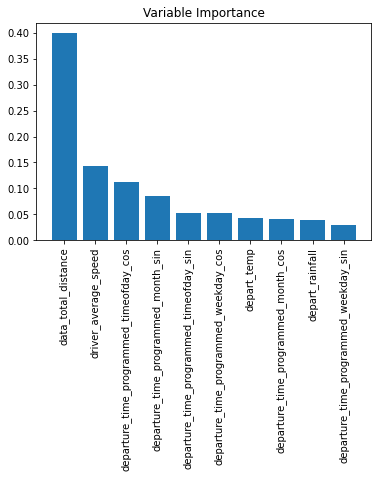

In [0]:
'''
  Let's look at importance of each variable determined by Random Forests.
'''
from sklearn.model_selection import cross_validate

rf_trained = cross_validate(model, X, y, cv=kfold, scoring='neg_mean_squared_error', return_estimator=True)

var_imp = pd.DataFrame(columns=features)
for idx,estimator in enumerate(rf_trained['estimator']):
  curr = dict(zip(features, estimator.feature_importances_.T))
  var_imp = var_imp.append(curr, ignore_index=True)

fig, ax = plt.subplots()

var_imp = var_imp.mean().sort_values(ascending=False)

heights = var_imp.values
ax.bar(np.arange(len(heights)), heights)
plt.xticks(np.arange(len(heights)))
ax.set_xticklabels(var_imp.keys(), rotation=90)
fig.set_size_inches(6, 4)
ax.set_title('Variable Importance')
plt.show()

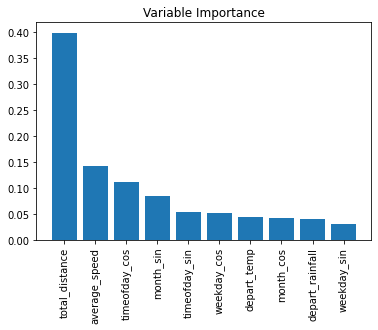

In [0]:
fig, ax = plt.subplots()

heights = var_imp.values
labels =  ['total_distance', 'average_speed', 'timeofday_cos', 'month_sin', 
          'timeofday_sin', 'weekday_cos', 'depart_temp', 'month_cos', 
          'depart_rainfall', 'weekday_sin']
ax.bar(np.arange(len(heights)), heights)
plt.xticks(np.arange(len(heights)))
ax.set_xticklabels(labels, rotation=90)
fig.set_size_inches(6, 4)
ax.set_title('Variable Importance')
plt.show()

In [0]:
'''
  Evalating our results

  While it seems like the mean and standard deviation of the errors is very
  high, it's important to note that this score is being calculated in seconds.
  Moreover, there are neglible benefits for a fleet coordinator to have arrival
  predictions in seconds versus minutes. Ultimately, the ability to predict
  truck arrival times requires many other factors including traffic information,
  road closures, and a generally larger dataset. By using departure time,
  driver, and weather data, we were able to increase prediction accuracy by
  ____% or ____ minutes on average.
'''
prediction_array = np.column_stack((X,y,predicted))
prediction_df = pd.DataFrame(prediction_array, columns=features + ['total_secs_actual', 'total_secs_predicted'])
prediction_df['total_mins_actual'] = prediction_df['total_secs_actual'] / 60
prediction_df['total_mins_predicted'] = prediction_df['total_secs_predicted'] / 60

display(prediction_df[0:10][['total_mins_actual', 'total_mins_predicted']])

,total_mins_actual,total_mins_predicted
0,564.0,571.448452
1,578.0,584.402833
2,519.0,537.892083
3,543.0,565.063370
4,506.0,519.020000
5,544.0,518.535000
6,601.0,631.048788
7,662.0,636.112695
8,617.0,628.871288
9,615.0,613.611967


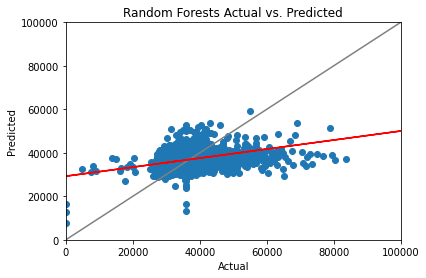

In [0]:
# simple actual vs predicted

import matplotlib.lines as lines

fig,ax = plt.subplots()
fig.set_size_inches(6,4)
ax.set_xlim(0,100000)
ax.set_ylim(0,100000)
ax.scatter(y, predicted)
l1 = lines.Line2D([0, 100000], [0, 100000], color='gray')
ax.add_line(l1)
m, b = np.polyfit(y, predicted, 1)
ax.plot(y, m*y + b, color='r')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Random Forests Actual vs. Predicted')
plt.show()

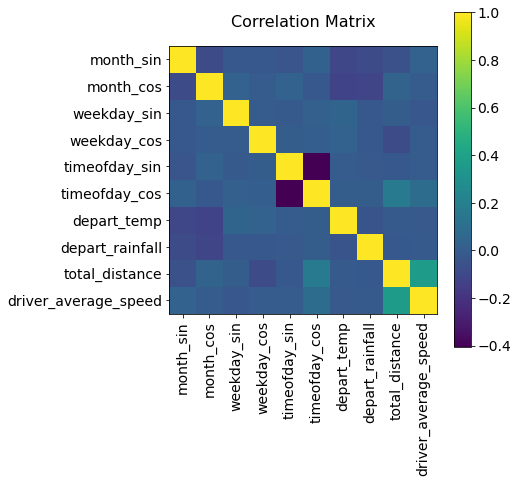

In [0]:
df = bog_med[features]

new_cols = ['month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'timeofday_sin', 
 'timeofday_cos', 'depart_temp', 'depart_rainfall', 'total_distance', 'driver_average_speed']
df.columns = new_cols

f = plt.figure(figsize=(6, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
f.gca().get_xaxis().set_ticks_position('bottom')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
new_cols = ['month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'timeofday_sin', 
 'timeofday_cos', 'depart_temp', 'depart_rainfall', 'total_distance', 'driver_average_speed']

df.columns = new_cols
df.columns

Index(['month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'timeofday_sin',
       'timeofday_cos', 'depart_temp', 'depart_rainfall', 'total_distance',
       'driver_average_speed'],
      dtype='object')